In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Amazon Sale Report.csv")

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\4029251621.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("Amazon Sale Report.csv")


In [3]:
data.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [4]:
data.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [5]:
data.shape

(128975, 24)

In [6]:
columns_to_remove=['ship-postal-code','Unnamed: 22','index','ASIN']

In [7]:
len(columns_to_remove)

4

In [8]:
#Remove columns
data.drop(columns=columns_to_remove, inplace=True)

In [9]:
#Drop null values 
data.dropna(subset="fulfilled-by", inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

Sales Analysis


In [12]:
#Sales Analysis
#TotalRevenue → Sum of Amount for all transactions.-
#SalesTrend → Revenue analysis over time (Date).-
#SalesByPlatform → Group revenue by Sales Channel.-
#SalesByCategory → Analyze revenue based on Category.-
#TopSellingProducts → Identify best-selling SKU based on Qty.-

In [13]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by'],
      dtype='object')

In [14]:
#Sum of all amount 
data["Amount"].sum()

np.float64(21061286.0)

In [15]:
# Aggregate Sales Amount by Date
sales_trend = data.groupby("Date")["Amount"].sum().head(20).sort_values(ascending=False)

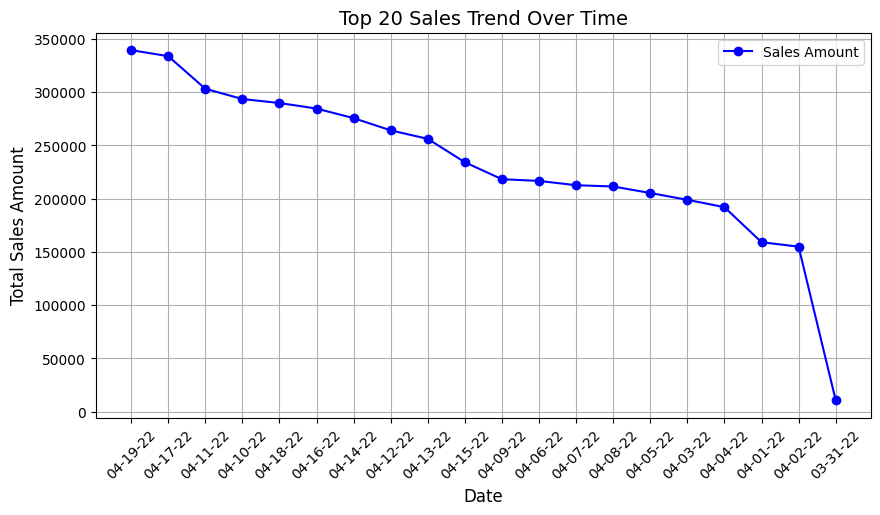

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(sales_trend.index, sales_trend.values, marker="o", linestyle="-", color="b", label="Sales Amount")

# Formatting the chart
plt.title("Top 20 Sales Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [17]:
# Ensure column names are correct
data["Amount"] = pd.to_numeric(data["Amount"], errors="coerce")  # Convert Amount to numeric

In [18]:
sales_by_platform = data.groupby("Sales Channel ")["Amount"].sum().sort_values(ascending=False)

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\4224582527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette="coolwarm", edgecolor="black")


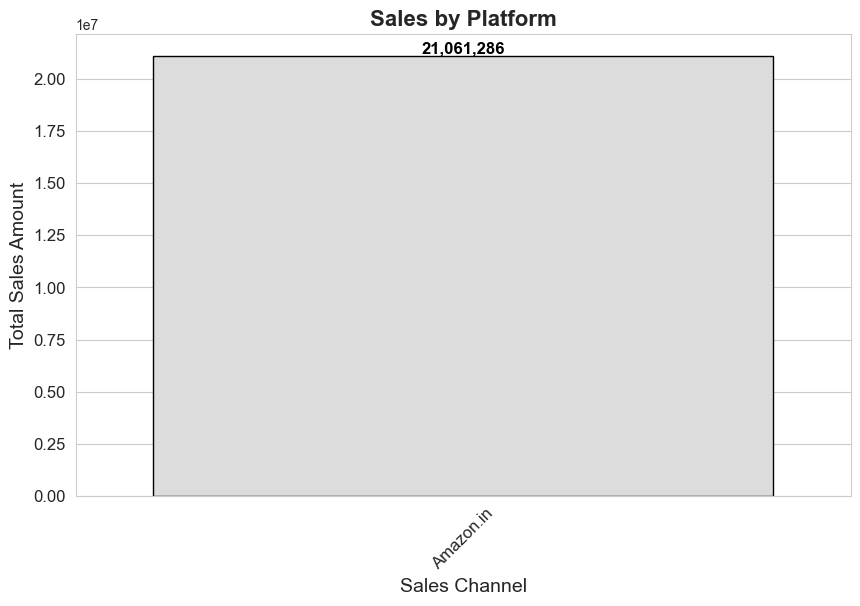

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar chart
ax = sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette="coolwarm", edgecolor="black")

# Formatting the chart
plt.title("Sales by Platform", fontsize=16, fontweight="bold")
plt.xlabel("Sales Channel", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [20]:
sales_by_category = data.groupby("Category")["Amount"].sum().sort_values(ascending=False)

In [21]:
sales_by_category

Category
Set              10016386.0
kurta             5278330.0
Western Dress     4351367.0
Top               1068857.0
Ethnic Dress       178964.0
Blouse              93390.0
Bottom              54067.0
Saree               19925.0
Name: Amount, dtype: float64

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\277997721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis", edgecolor="black")


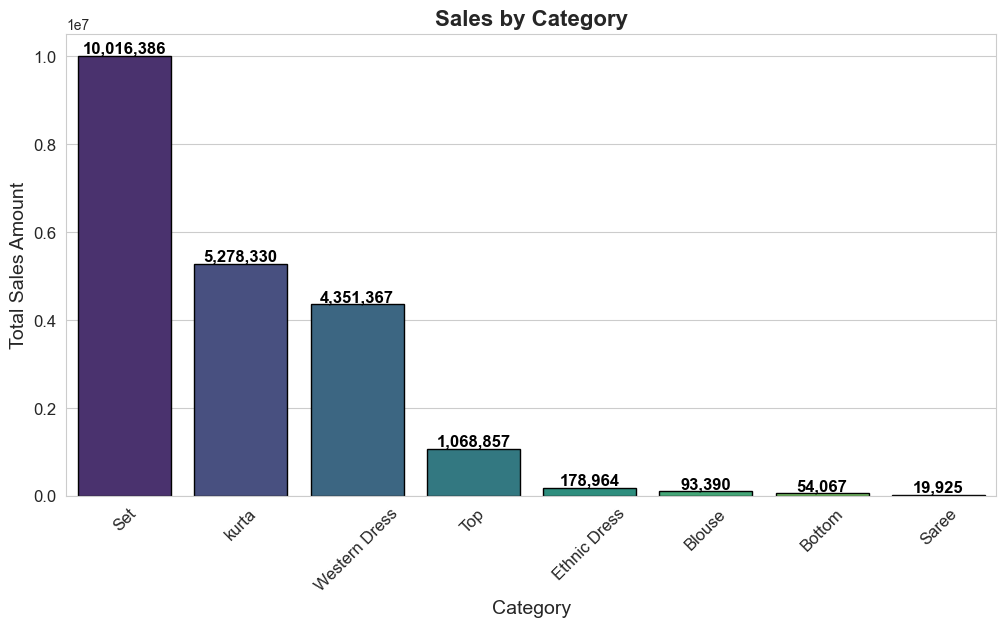

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="viridis", edgecolor="black")

# Formatting the chart
plt.title("Sales by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [23]:
top_selling_products = data.groupby("SKU")["Qty"].sum().sort_values(ascending=False).head(10)  # Top 10 products

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2917800370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette="magma", edgecolor="black")


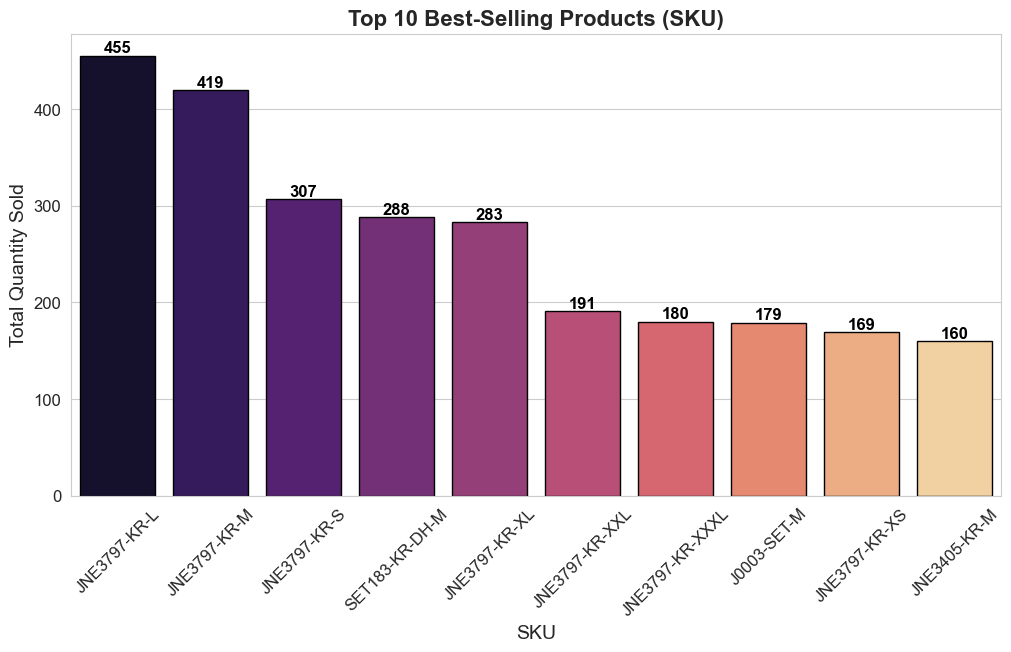

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette="magma", edgecolor="black")

# Formatting the chart
plt.title("Top 10 Best-Selling Products (SKU)", fontsize=16, fontweight="bold")
plt.xlabel("SKU", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

Profitability Analysis

In [25]:
#Profitability Analysis
#PerOrderProfit → Calculate profit per Order ID (Amount - Cost).-
#ProfitByChannel → Compare profitability across Sales Channel.-
#B2BvsB2C → Analyze margin differences between B2B and normal sales.-
#PromotionImpact → Check if promotion-ids improve sales and profit.-

In [26]:
revenue_per_order = data.groupby("Order ID")["Amount"].sum().sort_values(ascending=False).head(10)  # Top 10 orders

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\3561417736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=revenue_per_order.index, y=revenue_per_order.values, palette="coolwarm", edgecolor="black")


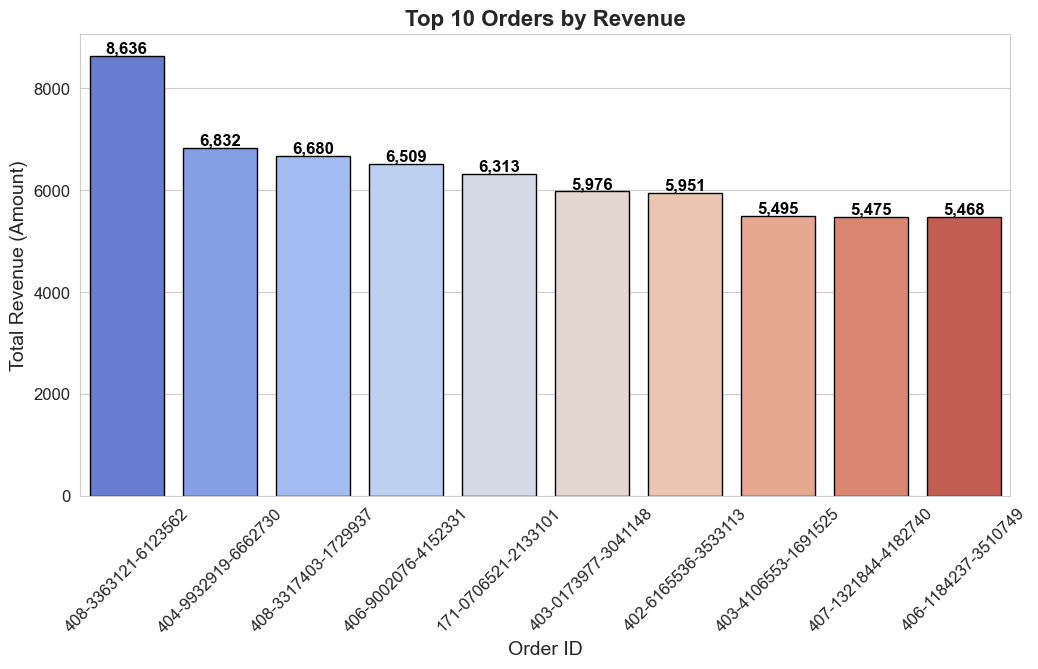

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=revenue_per_order.index, y=revenue_per_order.values, palette="coolwarm", edgecolor="black")

# Formatting the chart
plt.title("Top 10 Orders by Revenue", fontsize=16, fontweight="bold")
plt.xlabel("Order ID", fontsize=14)
plt.ylabel("Total Revenue (Amount)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [28]:
profit_by_channel = data.groupby("Sales Channel ")["Amount"].sum().sort_values(ascending=False)

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\783578353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=profit_by_channel.index, y=profit_by_channel.values, palette="plasma", edgecolor="black")


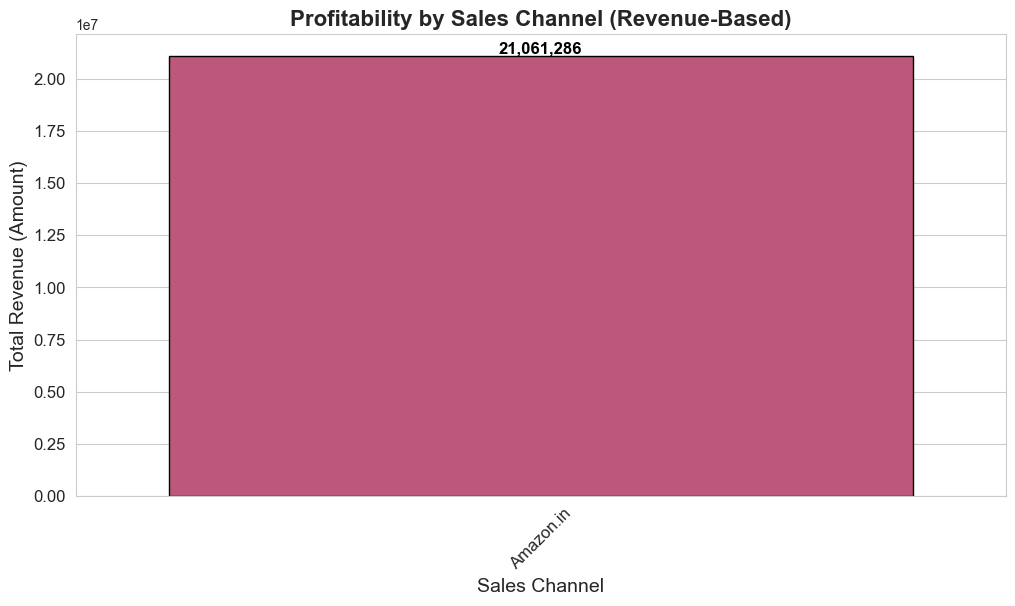

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=profit_by_channel.index, y=profit_by_channel.values, palette="plasma", edgecolor="black")

# Formatting the chart
plt.title("Profitability by Sales Channel (Revenue-Based)", fontsize=16, fontweight="bold")
plt.xlabel("Sales Channel", fontsize=14)
plt.ylabel("Total Revenue (Amount)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [30]:
# Ensure Amount is numeric
data["Amount"] = pd.to_numeric(data["Amount"], errors="coerce")

# Convert B2B column to categorical (assuming 1 = B2B, 0 = B2C)
data["B2B"] = data["B2B"].astype(str)


In [31]:
# Aggregate total revenue by B2B/B2C
b2b_vs_b2c = data.groupby("B2B")["Amount"].sum()

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2245247062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=b2b_vs_b2c.index, y=b2b_vs_b2c.values, palette=["#FF5733", "#33FF57"], edgecolor="black")


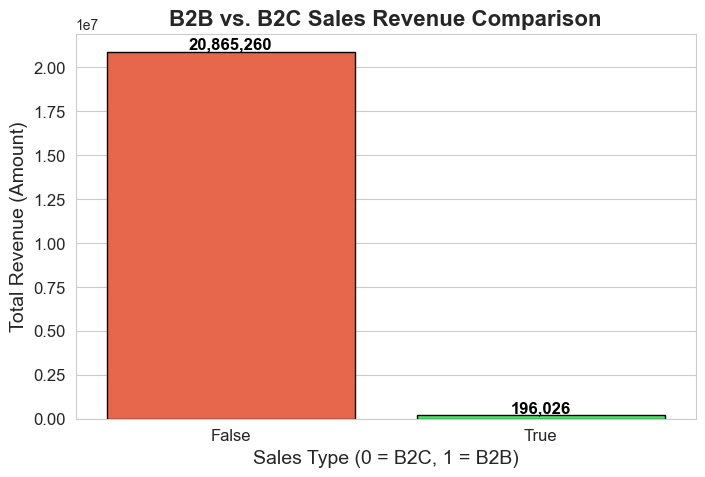

In [32]:
# Set Seaborn style for a professional look
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Create the bar chart
ax = sns.barplot(x=b2b_vs_b2c.index, y=b2b_vs_b2c.values, palette=["#FF5733", "#33FF57"], edgecolor="black")

# Formatting the chart
plt.title("B2B vs. B2C Sales Revenue Comparison", fontsize=16, fontweight="bold")
plt.xlabel("Sales Type (0 = B2C, 1 = B2B)", fontsize=14)
plt.ylabel("Total Revenue (Amount)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [33]:
data["Promotion Used"] = data["promotion-ids"].notna().astype(int)  # 1 = Used, 0 = Not Used

In [34]:
promotion_impact = data.groupby("Promotion Used")["Amount"].sum()

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\678963840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promotion_impact.index, y=promotion_impact.values, palette=["#FF5733", "#33FF57"], edgecolor="black")
C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\678963840.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.barplot(x=promotion_impact.index, y=promotion_impact.values, palette=["#FF5733", "#33FF57"], edgecolor="black")


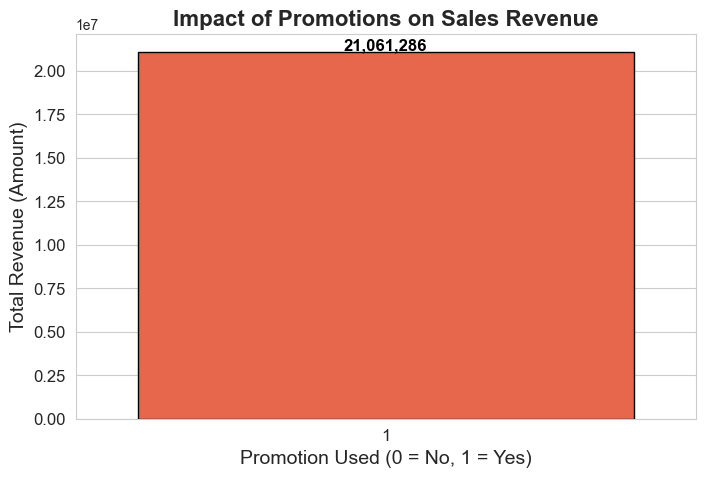

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Create the bar chart
ax = sns.barplot(x=promotion_impact.index, y=promotion_impact.values, palette=["#FF5733", "#33FF57"], edgecolor="black")

# Formatting the chart
plt.title("Impact of Promotions on Sales Revenue", fontsize=16, fontweight="bold")
plt.xlabel("Promotion Used (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Total Revenue (Amount)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

Inventory & Stock Analysis

In [36]:
#StockDepletionRate → Track stock movement based on Qty.-
#FastMovingProducts → Identify frequently ordered SKUs.-
#SlowMovingProducts → Detect SKUs with low sales volume.-

In [37]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2737556031.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"], errors="coerce")


In [38]:
data["Qty"] = pd.to_numeric(data["Qty"], errors="coerce")

In [39]:
daily_stock_movement = data.groupby("Date")["Qty"].sum()

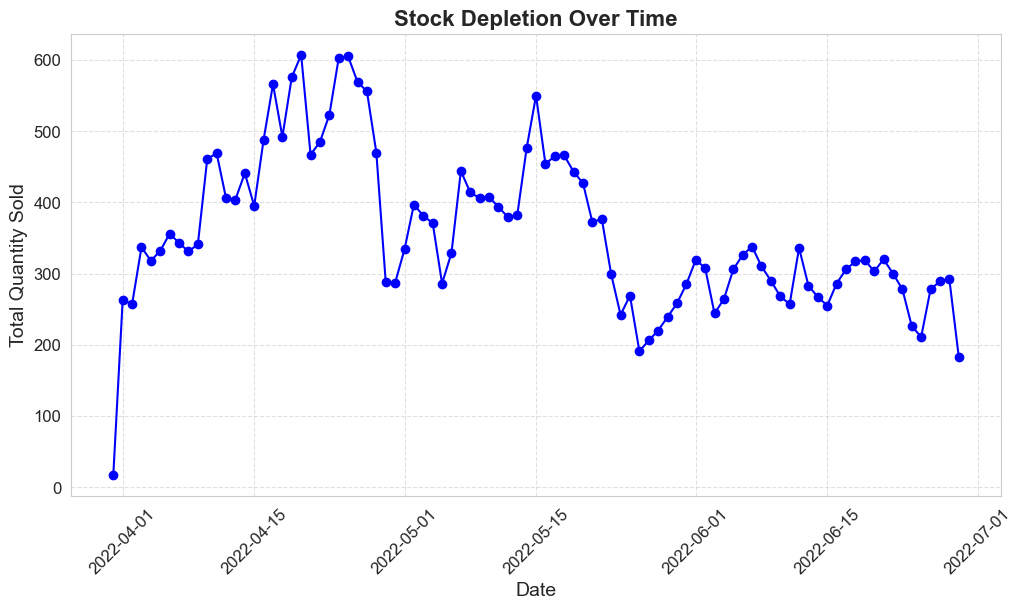

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the line chart
plt.plot(daily_stock_movement.index, daily_stock_movement.values, marker="o", linestyle="-", color="blue")

# Formatting the chart
plt.title("Stock Depletion Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

In [41]:
data["Qty"] = pd.to_numeric(data["Qty"], errors="coerce")

# Aggregate total quantity sold per SKU
fast_moving_products = data.groupby("SKU")["Qty"].sum().sort_values(ascending=False).head(10)  # Top 10 SKUs

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\1464271559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fast_moving_products.index, y=fast_moving_products.values, palette="magma", edgecolor="black")


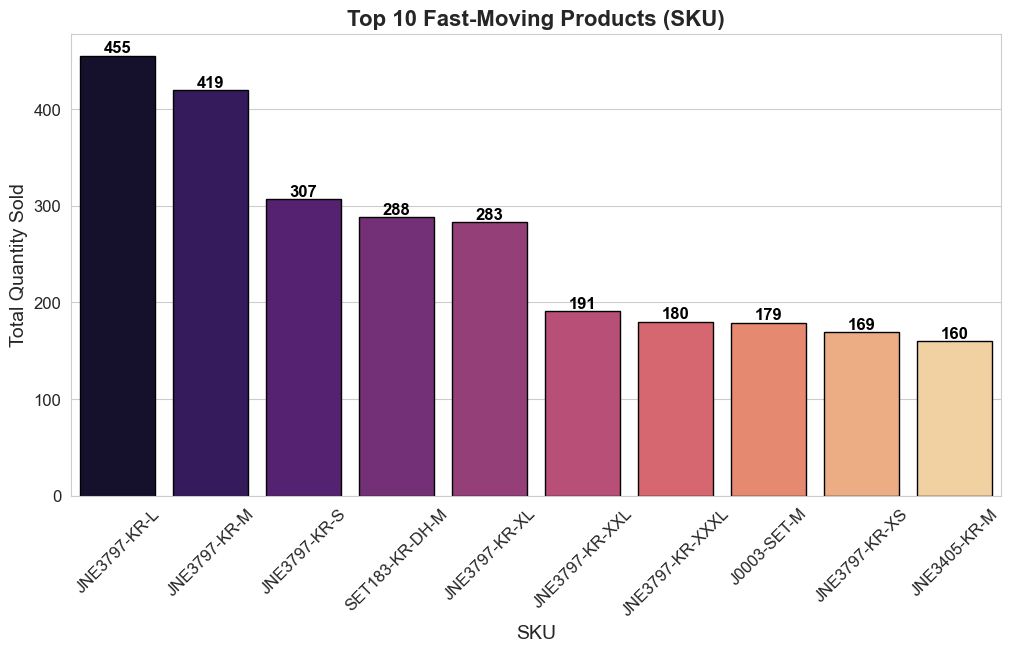

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=fast_moving_products.index, y=fast_moving_products.values, palette="magma", edgecolor="black")

# Formatting the chart
plt.title("Top 10 Fast-Moving Products (SKU)", fontsize=16, fontweight="bold")
plt.xlabel("SKU", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [43]:
slow_moving_products = data.groupby("SKU")["Qty"].sum().sort_values(ascending=True).head(10)  # Bottom 10 SKUs

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2420243456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=slow_moving_products.index, y=slow_moving_products.values, palette="coolwarm", edgecolor="black")


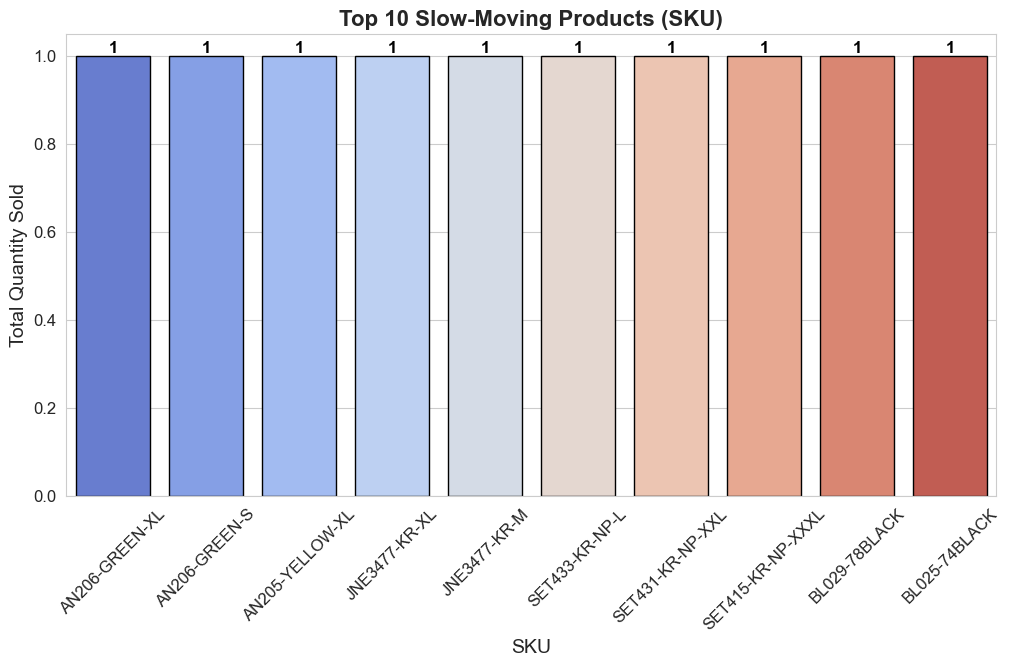

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=slow_moving_products.index, y=slow_moving_products.values, palette="coolwarm", edgecolor="black")

# Formatting the chart
plt.title("Top 10 Slow-Moving Products (SKU)", fontsize=16, fontweight="bold")
plt.xlabel("SKU", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

 Logistics & Fulfillment Analysis

In [45]:
#CourierPerformance → Compare Courier Status with delivery speed.-
#FulfillmentImpact → Assess impact of fulfilled-by on sales & returns.-
#ShippingAnalysis → Identify best-performing ship-service-level.-

In [46]:
courier_performance = data["Courier Status"].value_counts()

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\731011116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=courier_performance.index, y=courier_performance.values, palette="coolwarm", edgecolor="black")


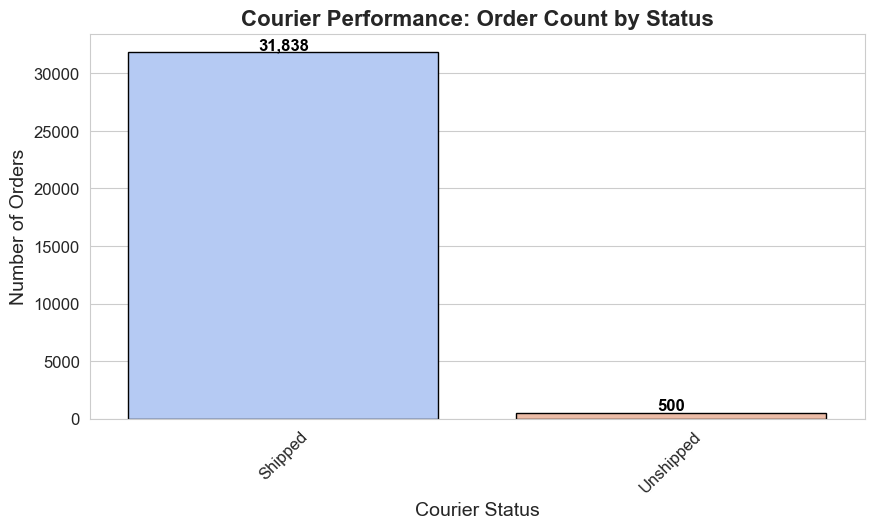

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Create the bar chart
ax = sns.barplot(x=courier_performance.index, y=courier_performance.values, palette="coolwarm", edgecolor="black")

# Formatting the chart
plt.title("Courier Performance: Order Count by Status", fontsize=16, fontweight="bold")
plt.xlabel("Courier Status", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [48]:
fulfillment_sales = data.groupby("fulfilled-by")["Amount"].sum().sort_values(ascending=False)
fulfillment_orders = data["fulfilled-by"].value_counts()

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2048959401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fulfillment_sales.index, y=fulfillment_sales.values, palette="Blues_r", edgecolor="black", ax=axes[0])
C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2048959401.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fulfillment_orders.index, y=fulfillment_orders.values, palette="coolwarm", edgecolor="black", ax=axes[1])


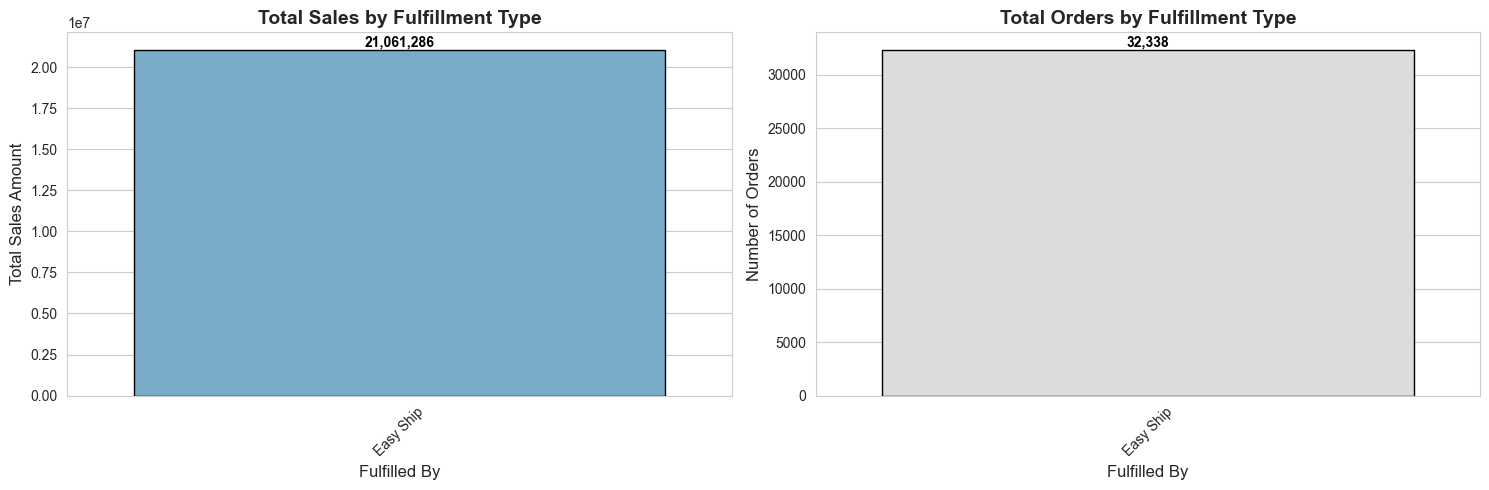

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sales Impact Bar Chart
sns.barplot(x=fulfillment_sales.index, y=fulfillment_sales.values, palette="Blues_r", edgecolor="black", ax=axes[0])
axes[0].set_title("Total Sales by Fulfillment Type", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Fulfilled By", fontsize=12)
axes[0].set_ylabel("Total Sales Amount", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Orders Impact Bar Chart
sns.barplot(x=fulfillment_orders.index, y=fulfillment_orders.values, palette="coolwarm", edgecolor="black", ax=axes[1])
axes[1].set_title("Total Orders by Fulfillment Type", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Fulfilled By", fontsize=12)
axes[1].set_ylabel("Number of Orders", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

plt.tight_layout()
plt.show()

In [50]:
shipping_orders = data["ship-service-level"].value_counts()

In [51]:
shipping_sales = data.groupby("ship-service-level")["Amount"].sum().sort_values(ascending=False)


C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\3431737274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_orders.index, y=shipping_orders.values, palette="coolwarm", edgecolor="black", ax=axes[0])
C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\3431737274.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_sales.index, y=shipping_sales.values, palette="Blues_r", edgecolor="black", ax=axes[1])


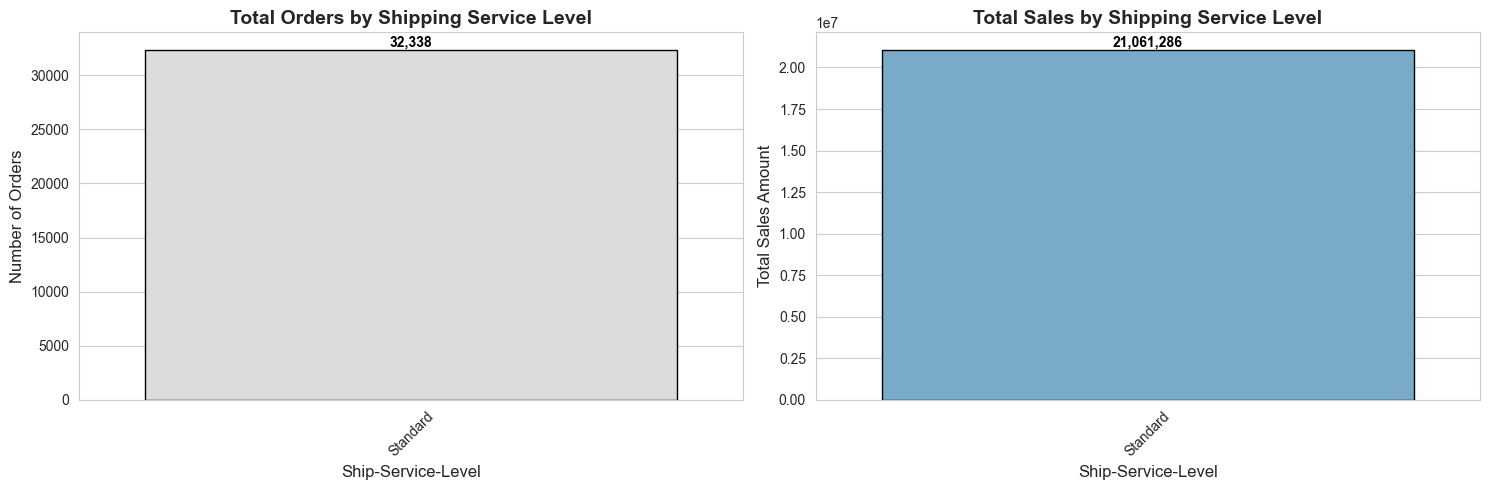

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Orders Count Bar Chart
sns.barplot(x=shipping_orders.index, y=shipping_orders.values, palette="coolwarm", edgecolor="black", ax=axes[0])
axes[0].set_title("Total Orders by Shipping Service Level", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Ship-Service-Level", fontsize=12)
axes[0].set_ylabel("Number of Orders", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Sales Impact Bar Chart
sns.barplot(x=shipping_sales.index, y=shipping_sales.values, palette="Blues_r", edgecolor="black", ax=axes[1])
axes[1].set_title("Total Sales by Shipping Service Level", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Ship-Service-Level", fontsize=12)
axes[1].set_ylabel("Total Sales Amount", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

plt.tight_layout()
plt.show()

Geographic Sales Analysis

In [53]:
#TopCities → Identify cities with highest Amount.-
#TopStates → Analyze sales by ship-state.-
#CountrywiseSales → Compare revenue across different ship-country.-

In [54]:
top_cities = data.groupby("ship-city")["Amount"].sum().sort_values(ascending=False).head(10)  # Top 10 cities

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\2637283673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma", edgecolor="black")


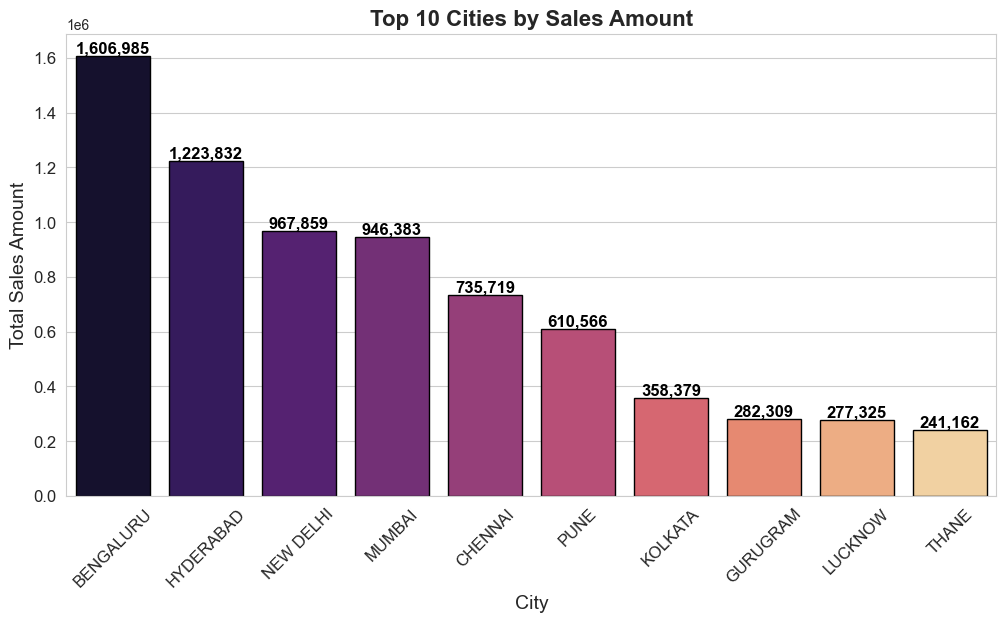

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma", edgecolor="black")

# Formatting the chart
plt.title("Top 10 Cities by Sales Amount", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [56]:
top_states = data.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(10)  # Top 10 states

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\1972389846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_states.index, y=top_states.values, palette="plasma", edgecolor="black")


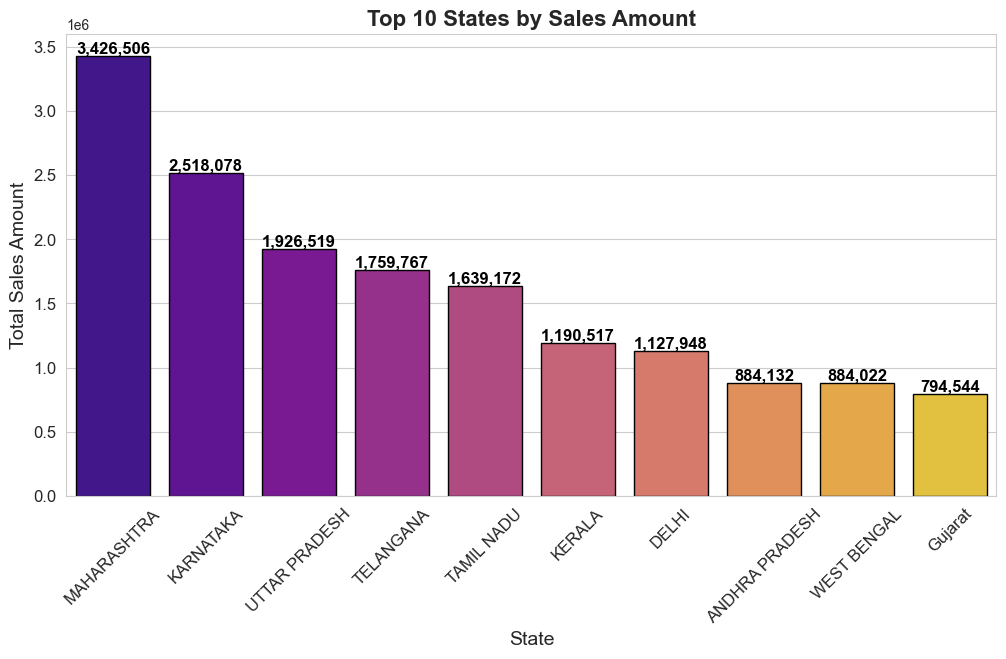

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=top_states.index, y=top_states.values, palette="plasma", edgecolor="black")

# Formatting the chart
plt.title("Top 10 States by Sales Amount", fontsize=16, fontweight="bold")
plt.xlabel("State", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [58]:
country_sales = data.groupby("ship-country")["Amount"].sum().sort_values(ascending=False)

C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\154205579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis", edgecolor="black")


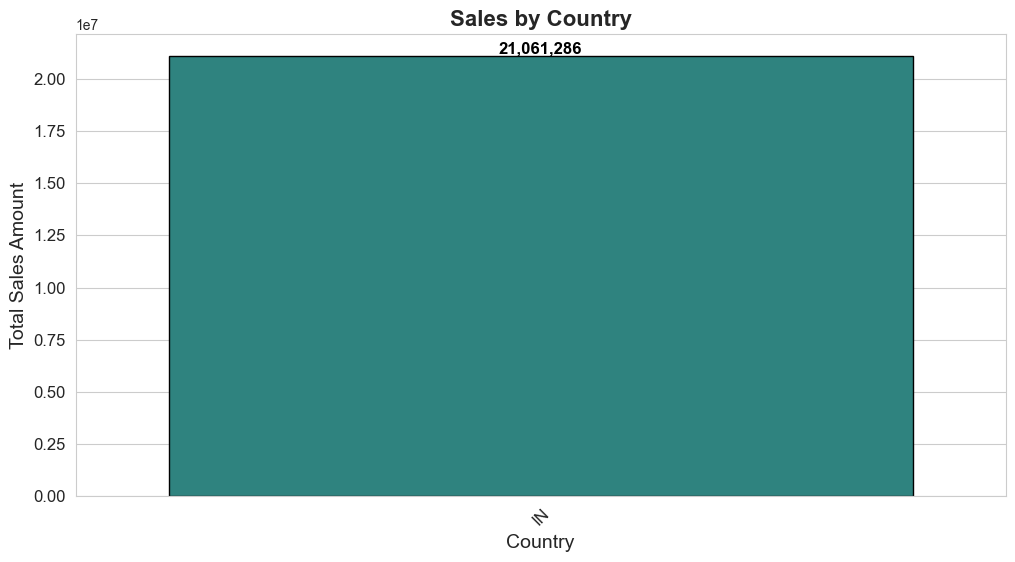

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis", edgecolor="black")

# Formatting the chart
plt.title("Sales by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()


Time-Based Analysis

In [60]:
#PeakSalesMonths → Find months with highest transactions.
#SeasonalTrends → Identify sales spikes during holidays or promotions.

In [61]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

In [62]:
data["Month"] = data["Date"].dt.strftime('%B')  # Extract full month name

In [63]:
monthly_sales = data.groupby("Month")["Order ID"].count().sort_values(ascending=False)

In [64]:
# Define month order for better visualization
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_sales = monthly_sales.reindex(month_order)


C:\Users\HCRMN\AppData\Local\Temp\ipykernel_12444\3481187477.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm", edgecolor="black")


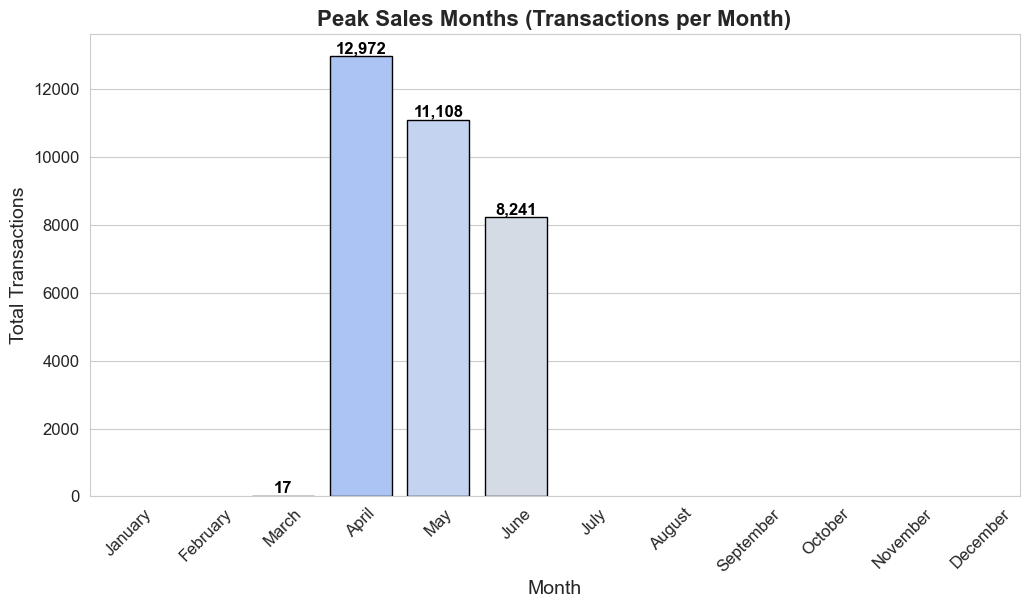

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar chart
ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm", edgecolor="black")

# Formatting the chart
plt.title("Peak Sales Months (Transactions per Month)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Transactions", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.show()

In [67]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

In [68]:
# Extract month and day for seasonal analysis
data["Month"] = data["Date"].dt.strftime('%B')  # Full month name
data["Day"] = data["Date"].dt.day


In [69]:
# Group sales data by month
monthly_sales = data.groupby("Month")["Amount"].sum().reindex(
    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)


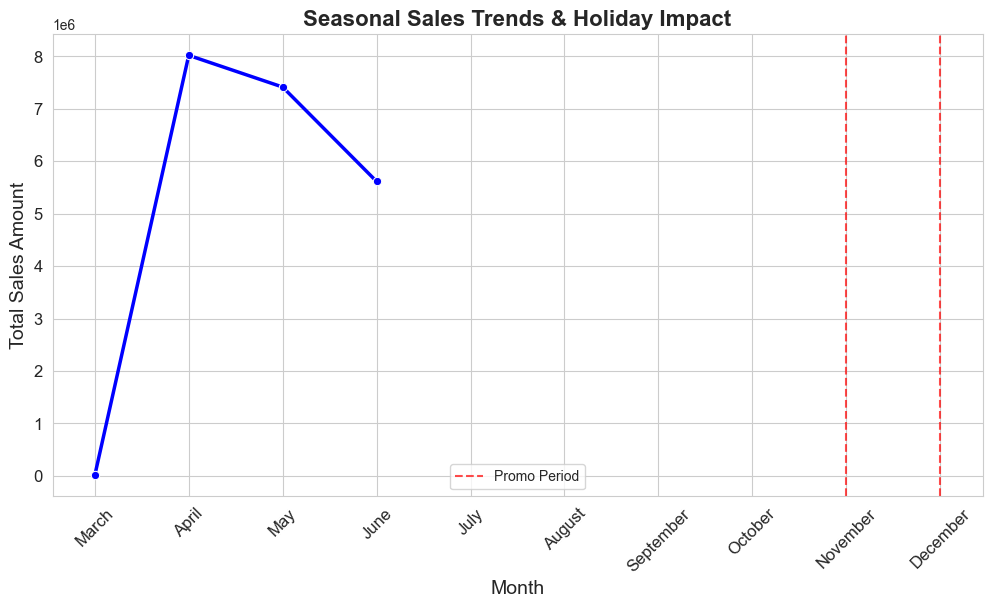

In [70]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create the line chart
ax = sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b", linewidth=2.5)

# Highlight key promotional periods or holidays
promotion_months = ["November", "December"]  # Example: Black Friday, Holiday Sales
for promo in promotion_months:
    plt.axvline(x=promo, color="red", linestyle="--", alpha=0.7, label="Promo Period" if promo == "November" else "")

# Formatting the chart
plt.title("Seasonal Sales Trends & Holiday Impact", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

# Show the chart
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


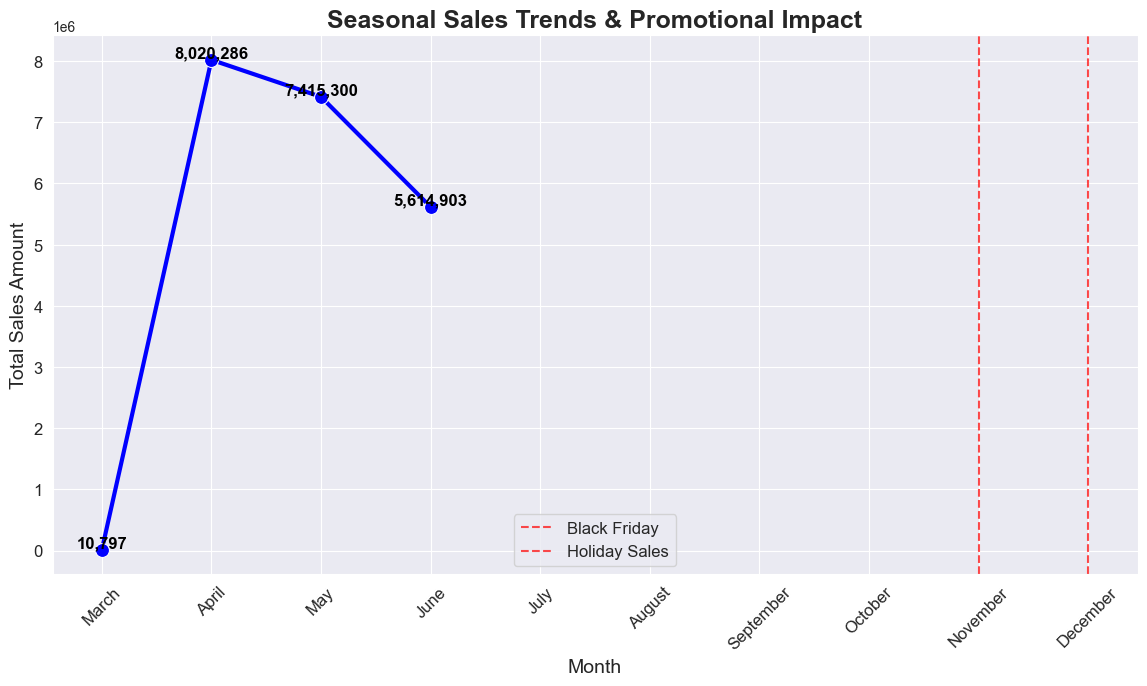

In [71]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))

# Create the line chart with markers
ax = sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, 
                   marker="o", markersize=10, linewidth=3, color="blue")

# Highlight peak months (Example: Black Friday, Christmas, Diwali Sales)
promotion_months = {"November": "Black Friday", "December": "Holiday Sales"}
for month, event in promotion_months.items():
    plt.axvline(x=month, color="red", linestyle="--", alpha=0.7, label=event)

# Formatting the chart
plt.title("Seasonal Sales Trends & Promotional Impact", fontsize=18, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales Amount", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for i, value in enumerate(monthly_sales):
    plt.text(i, value, f"{value:,.0f}", ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.legend(fontsize=12)
plt.show()